In [1]:
%matplotlib inline

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [4]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [5]:
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\2330.TW.csv',index_col=0,parse_dates=True)

In [6]:
state_means, _ = kf.filter(data['Close'])

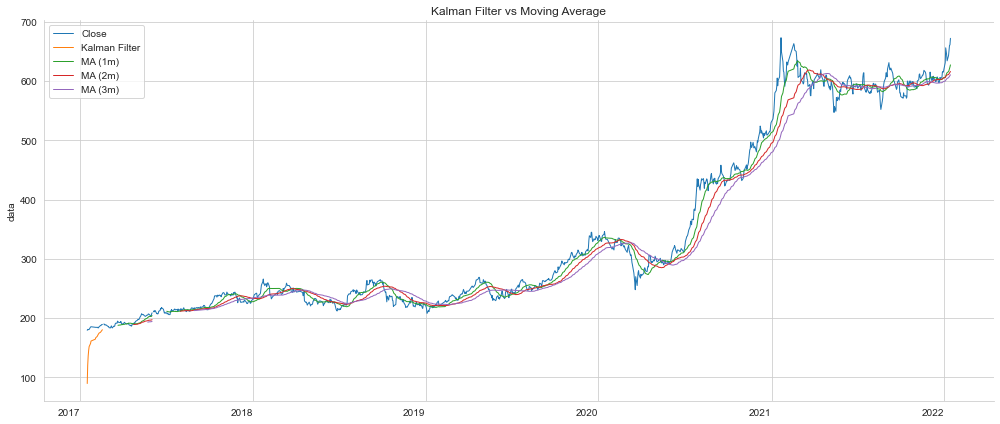

In [7]:
data_smoothed = data['Close'].to_frame()
data_smoothed['Kalman Filter'] = state_means
for months in [1,2,3]:
    data_smoothed[f'MA ({months}m)'] = data['Close'].rolling(window=months*21).mean().dropna()

ax = data_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('data')
plt.tight_layout()
sns.despine();

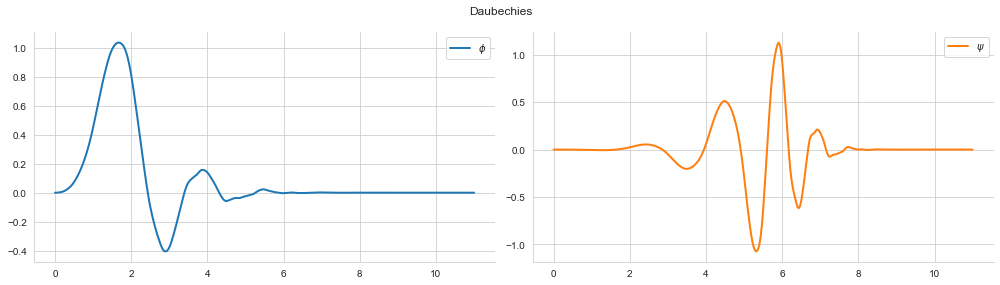

In [8]:
wavelet = pywt.Wavelet('db6')
phi, psi, x = wavelet.wavefun(level=5)
df = pd.DataFrame({'$\phi$': phi, '$\psi$': psi}, index=x)
df.plot(title='Daubechies', subplots=True, layout=(1, 2), figsize=(14, 4), lw=2, rot=0)
plt.tight_layout()
sns.despine();